In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 19s 83us/step - loss: 0.0016 - val_loss: 3.2818e-04
Epoch 2/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.1428e-04 - val_loss: 1.6903e-04
Epoch 3/150
227845/227845 [==============================] - 17s 76us/step - loss: 1.3497e-04 - val_loss: 1.2534e-04
Epoch 4/150
227845/227845 [==============================] - 17s 76us/step - loss: 1.2291e-04 - val_loss: 1.2222e-04
Epoch 5/150
227845/227845 [==============================] - 17s 76us/step - loss: 1.1437e-04 - val_loss: 1.2176e-04
Epoch 6/150
227845/227845 [==============================] - 17s 76us/step - loss: 1.0727e-04 - val_loss: 1.0894e-04
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 17s 76us/step - loss: 3.5851e-05 - val_loss: 3.6425e-05
Epoch 69/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.5360e-05 - val_loss: 3.5675e-05
Epoch 70/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.5171e-05 - val_loss: 3.6104e-05
Epoch 71/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.4855e-05 - val_loss: 3.5588e-05
Epoch 72/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.4864e-05 - val_loss: 3.4648e-05
Epoch 73/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.4403e-05 - val_loss: 3.9298e-05
Epoch 74/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.4343e-05 - val_loss: 3.1906e-05
Epoch 75/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.4091e-05 - val_loss: 3.4978e-05
Epoch 76/150
227845/227845 [==============================] - 17s 76u

227845/227845 [==============================] - 17s 74us/step - loss: 2.9271e-05 - val_loss: 2.8131e-05
Epoch 138/150
227845/227845 [==============================] - 17s 74us/step - loss: 2.9573e-05 - val_loss: 2.7942e-05
Epoch 139/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9058e-05 - val_loss: 2.9061e-05
Epoch 140/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9309e-05 - val_loss: 3.0256e-05
Epoch 141/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9304e-05 - val_loss: 2.7384e-05
Epoch 142/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9381e-05 - val_loss: 2.5855e-05
Epoch 143/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9032e-05 - val_loss: 3.4567e-05
Epoch 144/150
227845/227845 [==============================] - 17s 76us/step - loss: 2.9080e-05 - val_loss: 3.1979e-05
Epoch 145/150
227845/227845 [==============================] -

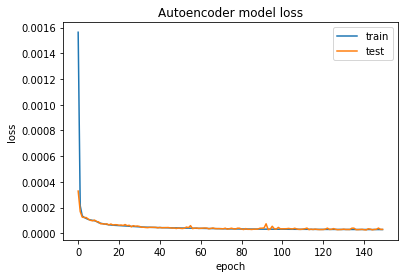

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 42s 186us/step - loss: 0.0329 - accuracy: 0.9914 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 2/50
227845/227845 [==============================] - 41s 178us/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/50
227845/227845 [==============================] - 41s 178us/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 4/50
227845/227845 [==============================] - 41s 178us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/50
227845/227845 [==============================] - 40s 178us/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/50
227845/227845 [==============================] - 40s 178us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/50
227845/227845 [=================

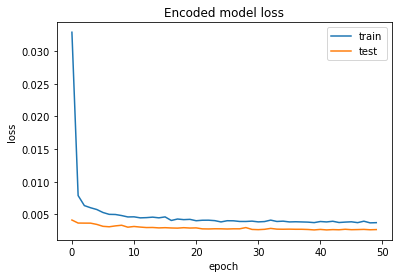

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994908886626171


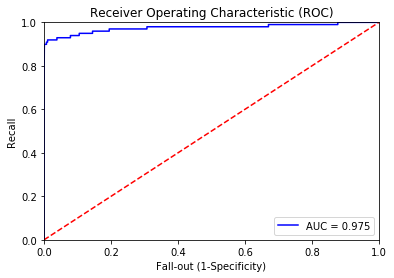

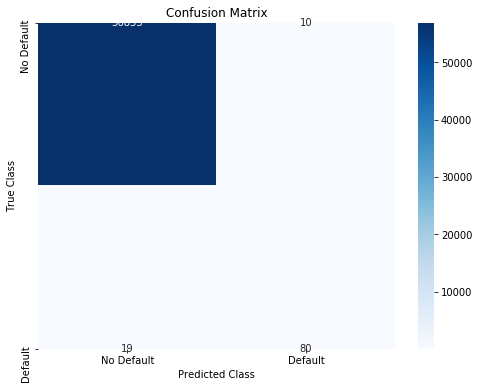

AUC(ROC): 0.9039524734000931
Precision: 0.8888888888888888
Recall: 0.8080808080808081
F1 score: 0.8465608465608466
False positives: 10
True positives: 80
False negatives: 19
True negatives: 56853
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 18s 78us/step - loss: 0.0016 - val_loss: 3.0775e-04
Epoch 2/150
227845/227845 [==============================] - 17s 77us/step - loss: 2.2866e-04 - val_loss: 1.7335e-04
Epoch 3/150
227845/227845 [==============================] - 18s 77us/step - loss: 1.5936e-04 - val_loss: 1.3487e-04
Epoch 4/150
227845/227845 [==============================] - 18s 77us/step - loss: 1.2636e-04 - val_loss: 1.1734e-04
Epoch 5/150
227845/227845 [==============================] - 17s 77us/step - loss: 1.1971e-04 - val_loss: 1.1707e-04
Epoch 6/150
227845/227845 [==============================] - 17s 76us/step - loss: 1.1008e-04 - val_loss: 1.0889e-04
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 17s 75us/step - loss: 3.9413e-05 - val_loss: 3.9886e-05
Epoch 69/150
227845/227845 [==============================] - 17s 74us/step - loss: 3.9581e-05 - val_loss: 5.1969e-05
Epoch 70/150
227845/227845 [==============================] - 17s 74us/step - loss: 3.9795e-05 - val_loss: 4.0060e-05
Epoch 71/150
227845/227845 [==============================] - 17s 74us/step - loss: 3.9062e-05 - val_loss: 4.2165e-05
Epoch 72/150
227845/227845 [==============================] - 17s 75us/step - loss: 3.9082e-05 - val_loss: 4.0969e-05
Epoch 73/150
227845/227845 [==============================] - 17s 74us/step - loss: 3.9121e-05 - val_loss: 4.0998e-05
Epoch 74/150
227845/227845 [==============================] - 17s 75us/step - loss: 3.8933e-05 - val_loss: 3.5967e-05
Epoch 75/150
227845/227845 [==============================] - 17s 75us/step - loss: 3.8755e-05 - val_loss: 3.9989e-05
Epoch 76/150
227845/227845 [==============================] - 17s 75u

227845/227845 [==============================] - 17s 76us/step - loss: 3.0344e-05 - val_loss: 3.1704e-05
Epoch 138/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0442e-05 - val_loss: 4.0350e-05
Epoch 139/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0587e-05 - val_loss: 3.0962e-05
Epoch 140/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0469e-05 - val_loss: 2.9312e-05
Epoch 141/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0100e-05 - val_loss: 2.8201e-05
Epoch 142/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0116e-05 - val_loss: 3.0957e-05
Epoch 143/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0305e-05 - val_loss: 2.9115e-05
Epoch 144/150
227845/227845 [==============================] - 17s 76us/step - loss: 3.0370e-05 - val_loss: 3.7939e-05
Epoch 145/150
227845/227845 [==============================] -

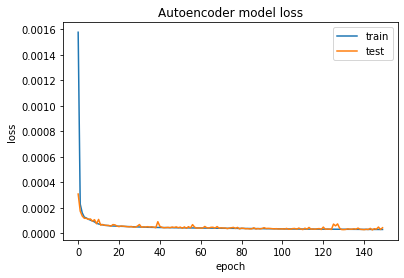

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 42s 183us/step - loss: 0.0246 - accuracy: 0.9932 - val_loss: 0.0067 - val_accuracy: 0.9991
Epoch 2/50
227845/227845 [==============================] - 41s 179us/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 3/50
227845/227845 [==============================] - 41s 179us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0051 - val_accuracy: 0.9992
Epoch 4/50
227845/227845 [==============================] - 41s 180us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 5/50
227845/227845 [==============================] - 41s 179us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 6/50
227845/227845 [==============================] - 41s 178us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 7/50
227845/227845 [=================

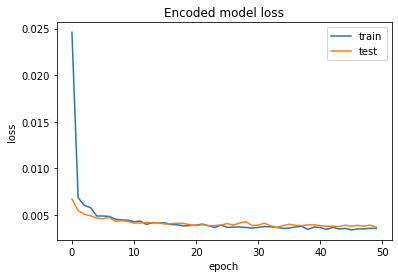

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993504441557529


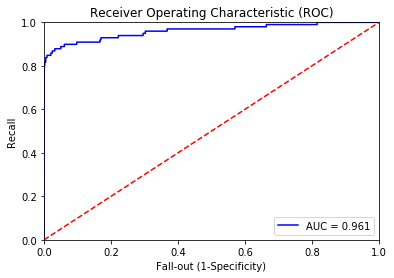

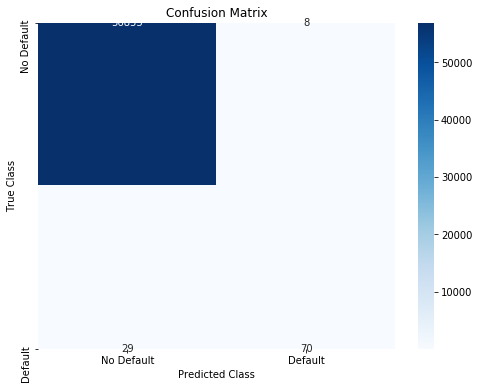

AUC(ROC): 0.8534650090231048
Precision: 0.8974358974358975
Recall: 0.7070707070707071
F1 score: 0.7909604519774011
False positives: 8
True positives: 70
False negatives: 29
True negatives: 56855
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 17s 76us/step - loss: 0.0016 - val_loss: 2.9105e-04
Epoch 2/150
227846/227846 [==============================] - 17s 73us/step - loss: 2.1105e-04 - val_loss: 1.6576e-04
Epoch 3/150
227846/227846 [==============================] - 17s 74us/step - loss: 1.4238e-04 - val_loss: 1.3582e-04
Epoch 4/150
227846/227846 [==============================] - 17s 73us/step - loss: 1.2642e-04 - val_loss: 1.2309e-04
Epoch 5/150
227846/227846 [==============================] - 17s 73us/step - loss: 1.1999e-04 - val_loss: 1.1871e-04
Epoch 6/150
227846/227846 [==============================] - 17s 73us/step - loss: 1.1116e-04 - val_loss: 1.0751e-04
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 17s 75us/step - loss: 4.1041e-05 - val_loss: 4.1501e-05
Epoch 69/150
227846/227846 [==============================] - 17s 75us/step - loss: 4.0842e-05 - val_loss: 4.1633e-05
Epoch 70/150
227846/227846 [==============================] - 17s 76us/step - loss: 4.0749e-05 - val_loss: 3.7928e-05
Epoch 71/150
227846/227846 [==============================] - 17s 76us/step - loss: 4.0488e-05 - val_loss: 3.6933e-05
Epoch 72/150
227846/227846 [==============================] - 17s 76us/step - loss: 4.0168e-05 - val_loss: 4.7752e-05
Epoch 73/150
227846/227846 [==============================] - 17s 76us/step - loss: 4.0091e-05 - val_loss: 4.6541e-05
Epoch 74/150
227846/227846 [==============================] - 17s 76us/step - loss: 3.9969e-05 - val_loss: 3.8595e-05
Epoch 75/150
227846/227846 [==============================] - 17s 76us/step - loss: 3.9656e-05 - val_loss: 3.6104e-05
Epoch 76/150
227846/227846 [==============================] - 17s 75u

227846/227846 [==============================] - 17s 75us/step - loss: 3.2964e-05 - val_loss: 3.1700e-05
Epoch 138/150
227846/227846 [==============================] - 17s 76us/step - loss: 3.3109e-05 - val_loss: 3.9301e-05
Epoch 139/150
227846/227846 [==============================] - 17s 75us/step - loss: 3.2808e-05 - val_loss: 6.2495e-05
Epoch 140/150
227846/227846 [==============================] - 17s 75us/step - loss: 3.3061e-05 - val_loss: 4.0901e-05
Epoch 141/150
227846/227846 [==============================] - 17s 76us/step - loss: 3.2644e-05 - val_loss: 3.2172e-05
Epoch 142/150
227846/227846 [==============================] - 17s 75us/step - loss: 3.3199e-05 - val_loss: 2.9753e-05
Epoch 143/150
227846/227846 [==============================] - 17s 76us/step - loss: 3.2487e-05 - val_loss: 3.7106e-05
Epoch 144/150
227846/227846 [==============================] - 17s 75us/step - loss: 3.2521e-05 - val_loss: 3.5870e-05
Epoch 145/150
227846/227846 [==============================] -

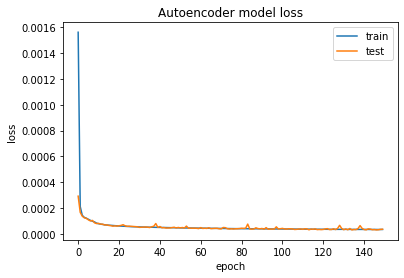

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 43s 189us/step - loss: 0.0292 - accuracy: 0.9930 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 2/50
227846/227846 [==============================] - 42s 185us/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/50
227846/227846 [==============================] - 42s 185us/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 4/50
227846/227846 [==============================] - 42s 184us/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/50
227846/227846 [==============================] - 42s 184us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 6/50
227846/227846 [==============================] - 42s 184us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 7/50
227846/227846 [=================

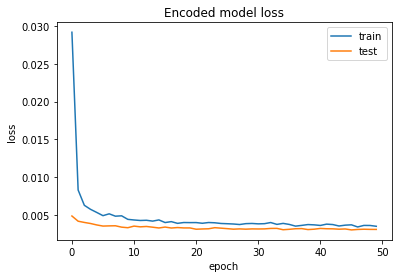

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999490879724724


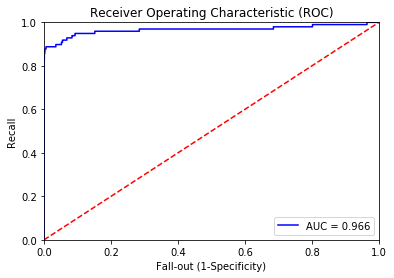

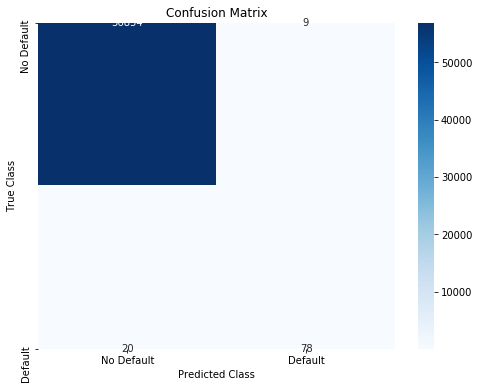

AUC(ROC): 0.8978800460971896
Precision: 0.896551724137931
Recall: 0.7959183673469388
F1 score: 0.8432432432432432
False positives: 9
True positives: 78
False negatives: 20
True negatives: 56854
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 19s 81us/step - loss: 0.0016 - val_loss: 2.6828e-04
Epoch 2/150
227846/227846 [==============================] - 18s 80us/step - loss: 2.0836e-04 - val_loss: 1.7835e-04
Epoch 3/150
227846/227846 [==============================] - 18s 80us/step - loss: 1.5030e-04 - val_loss: 1.4355e-04
Epoch 4/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.2929e-04 - val_loss: 1.2759e-04
Epoch 5/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.1116e-04 - val_loss: 1.1113e-04
Epoch 6/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.0200e-04 - val_loss: 9.2530e-05
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 18s 78us/step - loss: 3.5000e-05 - val_loss: 3.7258e-05
Epoch 69/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4835e-05 - val_loss: 3.5989e-05
Epoch 70/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4564e-05 - val_loss: 3.5981e-05
Epoch 71/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4360e-05 - val_loss: 3.9263e-05
Epoch 72/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4396e-05 - val_loss: 3.5205e-05
Epoch 73/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4155e-05 - val_loss: 8.3418e-05
Epoch 74/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4236e-05 - val_loss: 3.7682e-05
Epoch 75/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3906e-05 - val_loss: 3.8293e-05
Epoch 76/150
227846/227846 [==============================] - 18s 77u

227846/227846 [==============================] - 18s 77us/step - loss: 3.0175e-05 - val_loss: 3.9436e-05
Epoch 138/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9683e-05 - val_loss: 3.1801e-05
Epoch 139/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9572e-05 - val_loss: 3.0066e-05
Epoch 140/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9751e-05 - val_loss: 2.9830e-05
Epoch 141/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9720e-05 - val_loss: 3.1357e-05
Epoch 142/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9551e-05 - val_loss: 3.1161e-05
Epoch 143/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9546e-05 - val_loss: 3.8895e-05
Epoch 144/150
227846/227846 [==============================] - 17s 76us/step - loss: 2.9721e-05 - val_loss: 2.8644e-05
Epoch 145/150
227846/227846 [==============================] -

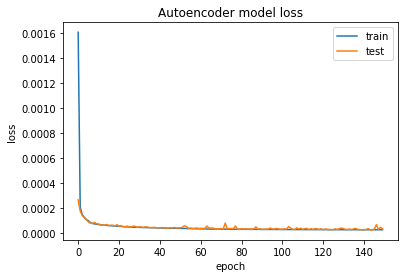

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 44s 193us/step - loss: 0.0341 - accuracy: 0.9914 - val_loss: 0.0072 - val_accuracy: 0.9987
Epoch 2/50
227846/227846 [==============================] - 43s 190us/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0066 - val_accuracy: 0.9991
Epoch 3/50
227846/227846 [==============================] - 43s 189us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 4/50
227846/227846 [==============================] - 43s 188us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 43s 187us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 6/50
227846/227846 [==============================] - 43s 187us/step - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 7/50
227846/227846 [=================

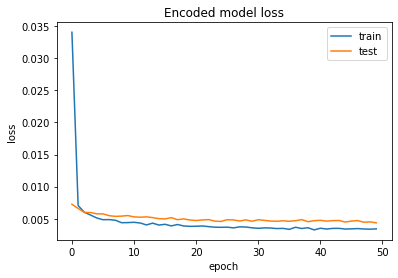

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992275416513052


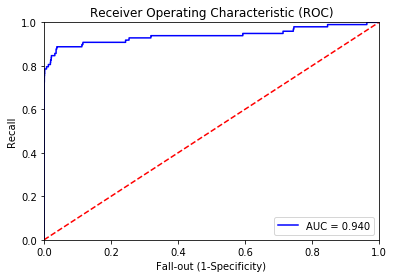

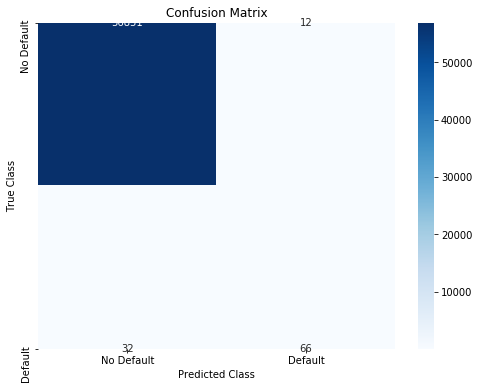

AUC(ROC): 0.836629177109178
Precision: 0.8461538461538461
Recall: 0.673469387755102
F1 score: 0.75
False positives: 12
True positives: 66
False negatives: 32
True negatives: 56851
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 18s 81us/step - loss: 0.0020 - val_loss: 3.4196e-04
Epoch 2/150
227846/227846 [==============================] - 18s 79us/step - loss: 2.1945e-04 - val_loss: 1.6469e-04
Epoch 3/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.4578e-04 - val_loss: 1.3188e-04
Epoch 4/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.2556e-04 - val_loss: 1.1757e-04
Epoch 5/150
227846/227846 [==============================] - 18s 78us/step - loss: 1.1583e-04 - val_loss: 1.3527e-04
Epoch 6/150
227846/227846 [==============================] - 18s 79us/step - loss: 1.0794e-04 - val_loss: 1.0455e-04
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 18s 79us/step - loss: 3.9639e-05 - val_loss: 3.8365e-05
Epoch 69/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.9574e-05 - val_loss: 4.2419e-05
Epoch 70/150
227846/227846 [==============================] - 18s 77us/step - loss: 3.9204e-05 - val_loss: 4.6402e-05
Epoch 71/150
227846/227846 [==============================] - 18s 77us/step - loss: 3.9099e-05 - val_loss: 3.7841e-05
Epoch 72/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.8763e-05 - val_loss: 4.2840e-05
Epoch 73/150
227846/227846 [==============================] - 18s 77us/step - loss: 3.8692e-05 - val_loss: 4.8886e-05
Epoch 74/150
227846/227846 [==============================] - 18s 77us/step - loss: 3.8983e-05 - val_loss: 3.7193e-05
Epoch 75/150
227846/227846 [==============================] - 18s 77us/step - loss: 3.8379e-05 - val_loss: 5.2992e-05
Epoch 76/150
227846/227846 [==============================] - 18s 77u

227846/227846 [==============================] - 18s 78us/step - loss: 3.4048e-05 - val_loss: 3.3683e-05
Epoch 138/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4106e-05 - val_loss: 3.2651e-05
Epoch 139/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3919e-05 - val_loss: 3.0418e-05
Epoch 140/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.4131e-05 - val_loss: 3.2335e-05
Epoch 141/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3983e-05 - val_loss: 3.9548e-05
Epoch 142/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3795e-05 - val_loss: 4.3138e-05
Epoch 143/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3908e-05 - val_loss: 4.6533e-05
Epoch 144/150
227846/227846 [==============================] - 18s 78us/step - loss: 3.3762e-05 - val_loss: 9.8297e-05
Epoch 145/150
227846/227846 [==============================] -

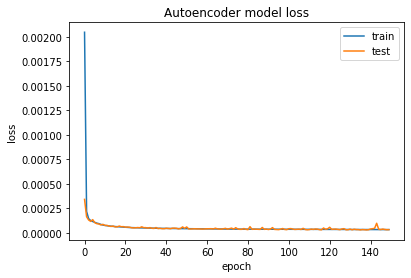

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 42s 186us/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 2/50
227846/227846 [==============================] - 42s 183us/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 3/50
227846/227846 [==============================] - 42s 183us/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 4/50
227846/227846 [==============================] - 42s 182us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 5/50
227846/227846 [==============================] - 42s 183us/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 6/50
227846/227846 [==============================] - 42s 183us/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/50
227846/227846 [=================

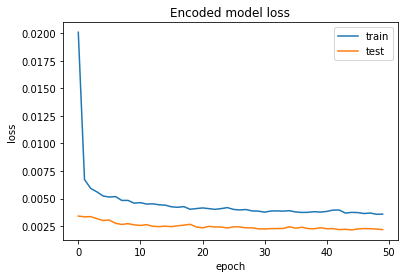

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9996137708256526


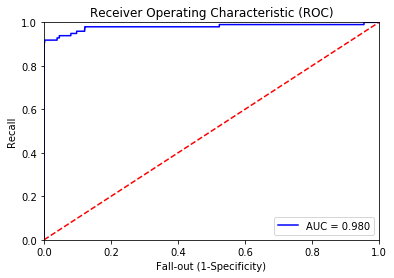

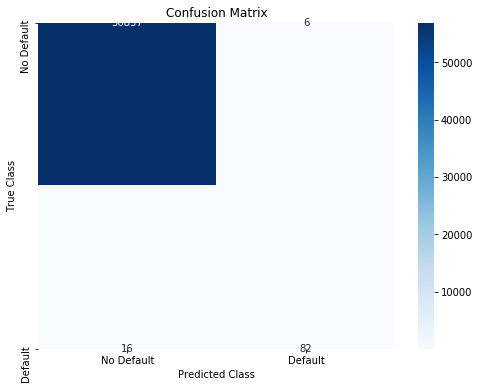

AUC(ROC): 0.9183145885545889
Precision: 0.9318181818181818
Recall: 0.8367346938775511
F1 score: 0.8817204301075268
False positives: 6
True positives: 82
False negatives: 16
True negatives: 56857


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 56854.0
 Average fp = 9.0
 Average fn = 23.2
 Average tp = 75.2
 Average Precision = 0.8931116389548693
 Average Recall = 0.7642276422764227
 Average F1 score = 0.8236582694414021


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284270
 Total fp: 45
 Total fn: 116
 Total tp: 376
 Total Precision = 0.8931116389548693
 Total Recall = 0.7642276422764228
 Total F1_score = 0.823658269441402


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 23548.87550020218 seconds ---
23548.87650036812


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

6.541354583435589
